# Exploratory Data Analysis (EDA) on retail sales data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# reading the dataset
df = pd.read_csv("C:/Users/Rohit Gupta/Downloads/retail_sales_dataset (1).csv")

In [4]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [5]:
df.shape

(1000, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


### As the datatypes of all columns present in the dataset are appropiate, then no datatype conversion is required.

In [7]:
# Data Cleaning
# Checking for missing values
print(df.isnull().sum())

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


### No null values are present in the dataset

In [8]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

### No duplicate values are present in dataset

In [71]:
# Descriptive statistics for numerical columns
numerical_cols = ['Quantity', 'Price per Unit', 'Total Amount']
df[numerical_cols].describe()

,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.000000,1000.000000
mean,2.514000,179.890000,456.000000
std,1.132734,189.681356,559.997632
min,1.000000,25.000000,25.000000
25%,1.000000,30.000000,60.000000
50%,3.000000,50.000000,135.000000
75%,4.000000,300.000000,900.000000
max,4.000000,500.000000,2000.000000


In [11]:
print(df.columns)

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')


## Time Series Analysis

In [12]:
# Converting 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [13]:
# Setting 'Date' column as index
df.set_index('Date', inplace=True)

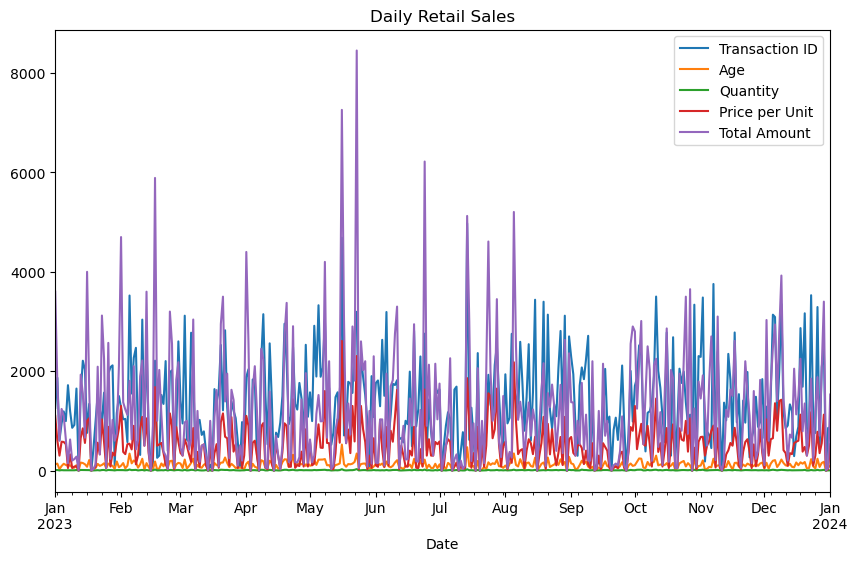

In [14]:
# Daily Sales Trend
df.resample('D').sum().plot(figsize=(10, 6))  
plt.title('Daily Retail Sales')
plt.show()

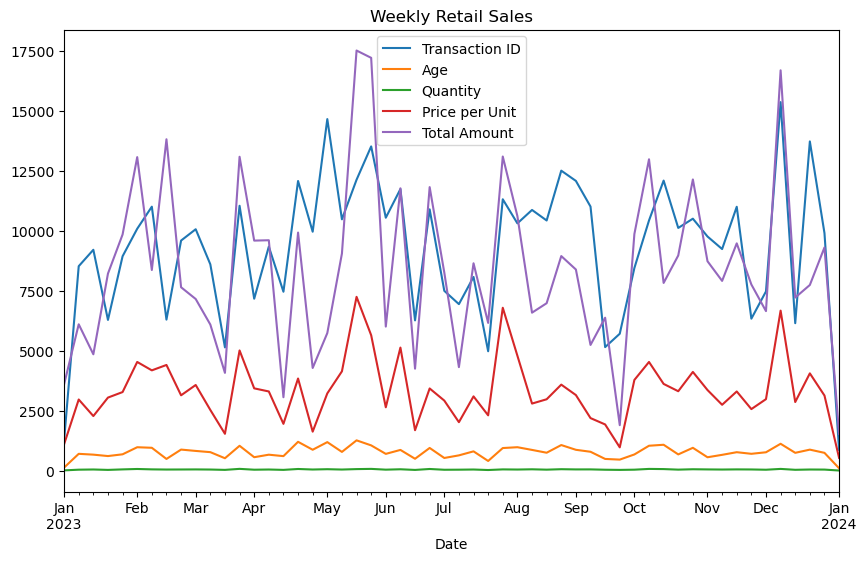

In [15]:
# weekly sales trend
df.resample('W').sum().plot(figsize=(10, 6))
plt.title('Weekly Retail Sales')
plt.show()

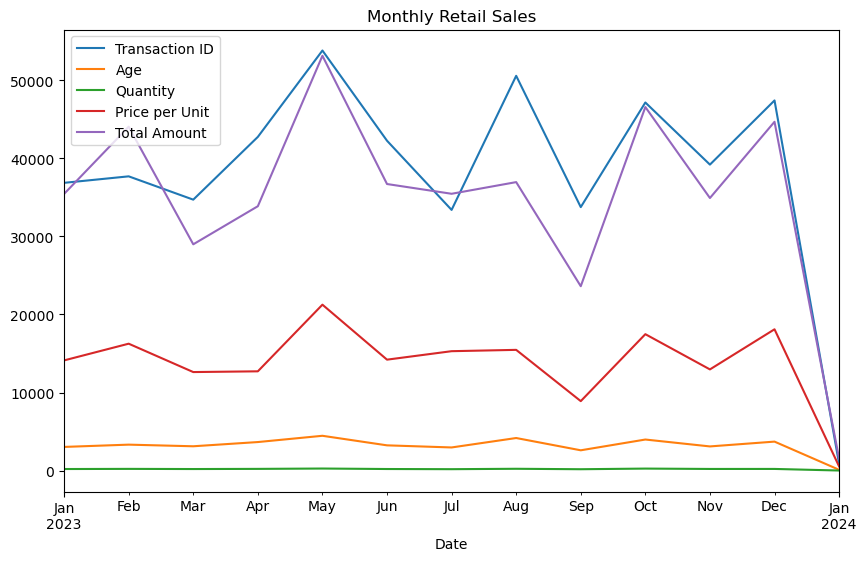

In [16]:
# monthly sales trend
df.resample('M').sum().plot(figsize=(10, 6))
plt.title('Monthly Retail Sales')
plt.show()


### So, as per the above chart, it is clear that sales are high for month of May for the durations of Jan 2023 to Jan 2024. So, the promotions should be planned accordingly.

## Customer and Product Analysis

In [25]:
# Analyze customer demographics
customer_demographics = df.groupby('Gender')['Age'].describe()
print(customer_demographics)

        count       mean        std   min   25%   50%    75%   max
Gender                                                            
Female  510.0  41.356863  13.568067  18.0  29.0  42.0  52.75  64.0
Male    490.0  41.428571  13.812208  18.0  30.0  42.0  54.00  64.0


### More Products are purchased by Females as compare to males. So, it is recommended to tailor the marketing campaigns targeting females will be beneficial.

In [28]:
# Analyze purchasing behavior
purchase_behavior = df.groupby('Product Category').agg({'Quantity': 'sum', 'Total Amount': 'sum'})
print(purchase_behavior)

                  Quantity  Total Amount
Product Category                        
Beauty                 771        143515
Clothing               894        155580
Electronics            849        156905


###  Clothing is the top-selling product category as per the quantity. Although, sales is high for electronics product category. So, promoting both of these categories will be profitable. Also, it is recommended to review the inventory levels to ensure sufficient stock for both of them.

# Visualization

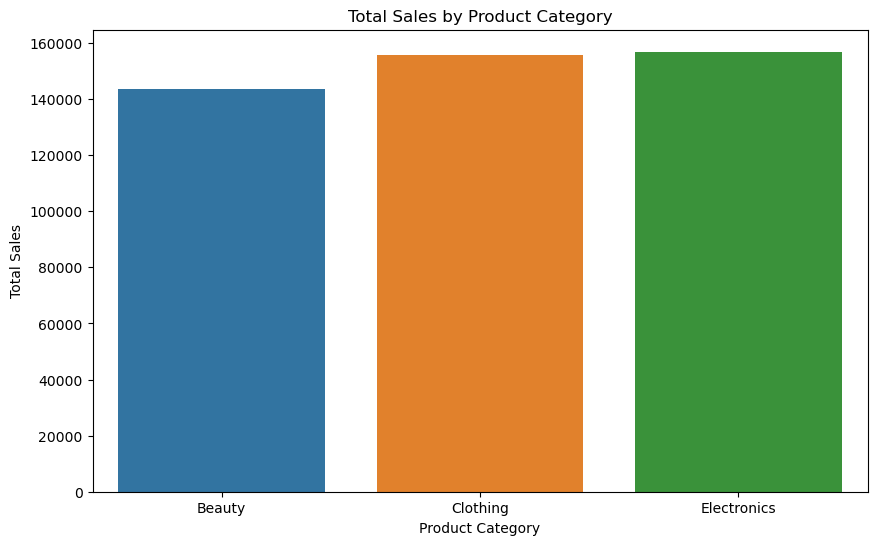

In [40]:
# Bar chart for product category sales
plt.figure(figsize=(10, 6))
sns.barplot(x=purchase_behavior.index, y='Total Amount', data=purchase_behavior)
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()

### So, it is clear form the above chart that the electronics is the top selling product category which generates the highest revenue. Also, clothing is also near electronics product category.

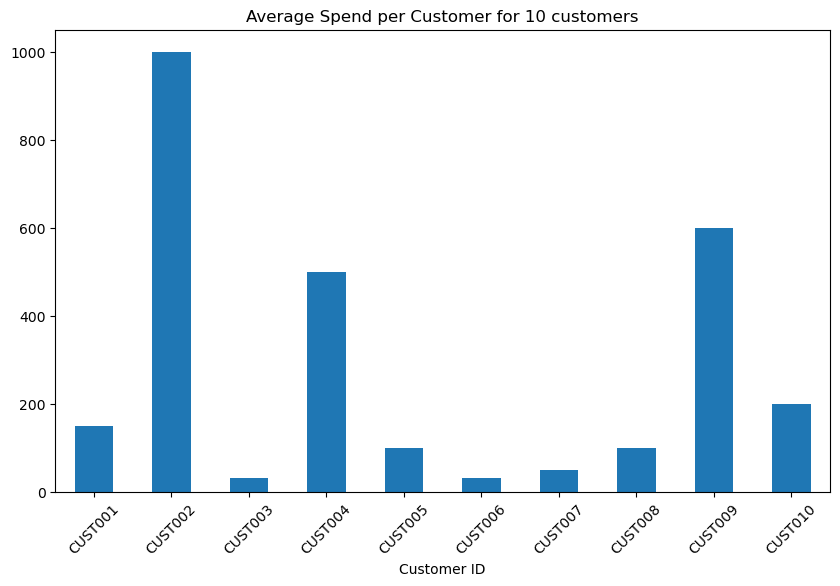

In [45]:
# bar chart showing the average spend per customer
plt.figure(figsize=(10, 6))
avg_spend_per_customer.plot(kind='bar')
plt.title('Average Spend per Customer for 10 customers')
plt.xticks(rotation=45)
plt.show()

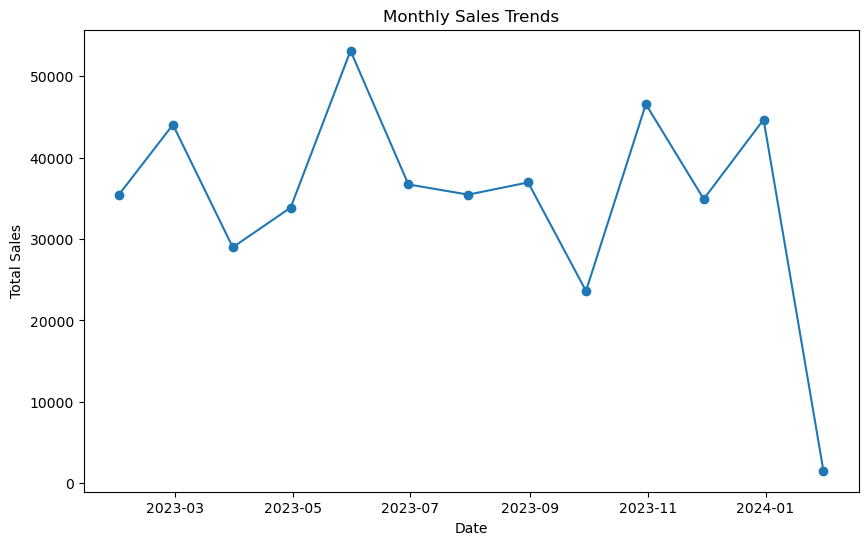

In [48]:
# Line plot for sales trends over time
monthly_sales = df['Total Amount'].resample('M').sum()

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

### So, it is clear from the above line chart that maximum sales happen in between May and July month.

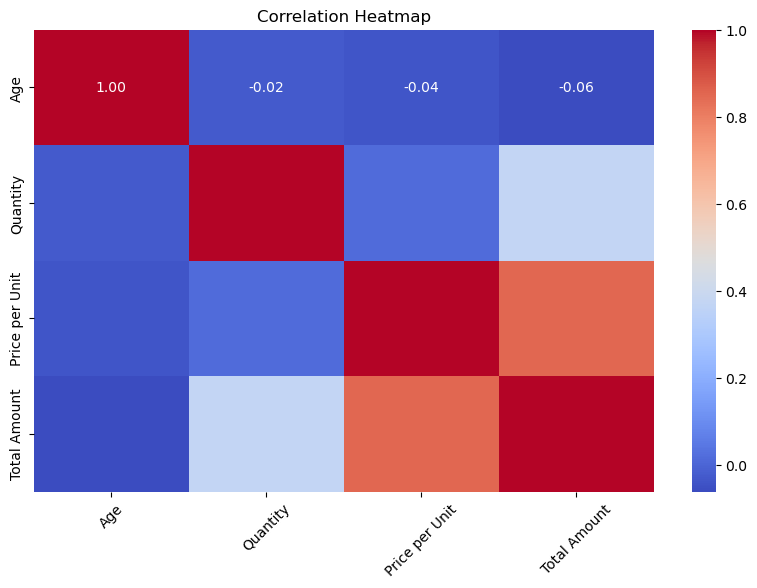

In [70]:
# Heatmap for correlation between variables
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')+
plt.xticks(rotation=45)
plt.show()

### In the above heatmap, blue represents a negative correlation, red represents a positive correlation, and white represents no correlation. Also, the diagonal line of the heatmap (from top left to bottom right) is a solid color which represents the correlation of a variable with itself is 1 which is expected since it is the same variable.
- Price per unit and Total Amount have a very positive correlation (around 0.8) as they are in red color. This is expected since the total amount is directly influenced by the unit price and quantity.
- As per for the rest of the numerical variables, neagative correlation exists as they are in blue color.
- Very weak or no correlation exists between quantity and total amount.

# Recommendations:
- As the sales are high in the month of May, so running more ads and offers is recommended.
- As females purchase more products than males, so tailoring the marketing campaigns targeting females will be beneficial.
- As beauty is the underperforming product category, then offering promotions or discounts on it is recommended to increase its sales.
- Electronics is the top selling product category, then increasing marketing efforts for this particular product category will be beneficial.
- As "Age" has a weak negative correlation with "Quantity", "Price per unit" (-0.04), and "Total Amount" (-0.06). This suggests that as age increases, these other variables tend to slightly decrease. So, it means targeting younger people will be beneficial as they are more likely to buy the products than the older ones. 